# PPB: Julien Petitjean Take Home Assignment

Task: build a model that predicts the 365-day revenue measure provided using any available observations after just 7 days (taken from SQL query in task 1)

# Intro

## Methodology

follow CRISP-DM framework

1. Import necessary modules and data
2. Review data
3. EDA
4. Model Preparation
5. Build and Evaluate Model
6. Conclusion

# 1. Import Data

data was taken from data_final csv file, which was created using the SQL query in task 1 

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [138]:
df = pd.read_csv('data_final.csv')
df.head()

,account_id_hide,brand_nk,first_settled_product_date,sbk_expected_net_revenue_gbp_365,sum_of_depos_total_count_over_7days,sum_of_depos_total_grs_gbp_over_7days,sum_of_withd_total_count_over_7days,sum_of_withd_total_grs_gbp_over_7days,sum_of_sbk_placed_count_singles_over_7days,sum_of_sbk_placed_count_multis_over_7days,...,sum_of_sbk_total_stake_gbp_over_7days,sum_of_sbk_total_gross_rev_gbp_over_7days,sum_of_sbk_total_net_rev_gbp_over_7days,sum_of_sbk_expected_net_revenue_gbp_over_7days,most_recent_status,most_recent_security_status,most_recent_region,most_recent_stake_factor_group,most_recent_marketing_channel,most_recent_liability_group
0,1,BF,21/01/2019,78.704866,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,20.0,20.0,2.506946,Active,Default - Set when A/C Opened,United Kingdom,Standard,Affiliates,NaN
1,1,PP,24/01/2019,11.194891,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Active,Default - Set when A/C Opened,United Kingdom,Standard,PPC Brand,NaN
2,2,BF,02/01/2019,19.898938,2.0,30.0,0.0,0.0,NaN,NaN,...,0.00,0.0,0.0,NaN,Active,Default - Set when A/C Opened,United Kingdom,Standard,Affiliates,NaN
3,2,PP,22/01/2019,6682.273150,24.0,985.0,0.0,0.0,67.0,39.0,...,1746.91,758.0,748.0,158.183658,Active,Default - Set when A/C Opened,United Kingdom,Standard,SEO,NaN
4,3,BF,03/01/2019,20.213603,1.0,250.0,0.0,0.0,2.0,0.0,...,250.00,250.0,250.0,6.838911,Active,Default - Set when A/C Opened,United Kingdom,Standard,Direct,NaN


# 2. Review

In [139]:
df.shape

(8724, 27)

In [140]:
df.describe()

,account_id_hide,sbk_expected_net_revenue_gbp_365,sum_of_depos_total_count_over_7days,sum_of_depos_total_grs_gbp_over_7days,sum_of_withd_total_count_over_7days,sum_of_withd_total_grs_gbp_over_7days,sum_of_sbk_placed_count_singles_over_7days,sum_of_sbk_placed_count_multis_over_7days,sum_of_sbk_placed_count_legs_over_7days,sum_of_sbk_placed_count_bets_over_7days,sum_of_sbk_price_low_leg_count_over_7days,sum_of_sbk_price_medium_leg_count_over_7days,sum_of_sbk_price_high_leg_count_over_7days,sum_of_sbk_price_very_high_leg_count_over_7days,sum_of_sbk_total_count_placed_over_7days,sum_of_sbk_total_stake_gbp_over_7days,sum_of_sbk_total_gross_rev_gbp_over_7days,sum_of_sbk_total_net_rev_gbp_over_7days,sum_of_sbk_expected_net_revenue_gbp_over_7days
count,8724.000000,8724.000000,7325.000000,7325.000000,7325.000000,7325.000000,7480.000000,7480.000000,7480.000000,7480.000000,7480.000000,7480.000000,7480.000000,7480.000000,8642.000000,8642.000000,8642.000000,8642.000000,7898.000000
mean,2338.411967,74.969154,2.375563,71.825046,0.569147,44.712597,6.304813,2.682219,20.141310,8.987032,1.711765,3.007086,2.749599,3.818583,7.777482,104.670647,7.226731,-1.172496,3.281892
std,1498.556961,1111.574373,3.796895,319.122994,1.330862,265.147549,16.436668,7.121617,46.014874,19.180244,4.579330,8.312349,6.901519,9.408050,18.104670,806.619614,180.549633,180.159736,48.220693
min,1.000000,-13418.973240,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4543.043312,-4543.043312,-931.744207
25%,1091.000000,-1.564282,1.000000,10.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,-0.720000,-4.456990
50%,2181.500000,7.095523,1.000000,15.000000,0.000000,0.000000,2.000000,1.000000,7.000000,4.000000,0.000000,1.000000,1.000000,1.000000,3.000000,20.000000,9.018000,4.885000,2.554397
75%,3351.250000,27.865755,2.000000,40.000000,1.000000,15.000000,5.000000,2.000000,19.000000,8.000000,2.000000,3.000000,3.000000,3.000000,7.000000,49.537500,23.872500,10.000000,7.546897
max,5532.000000,66954.579080,65.000000,9000.000000,37.000000,7450.000000,578.000000,131.000000,1273.000000,578.000000,124.000000,207.000000,157.000000,216.000000,578.000000,52471.660000,6041.540000,6031.540000,1693.274630


In [141]:
df.isnull().sum()

account_id_hide                                       0
brand_nk                                              0
first_settled_product_date                            0
sbk_expected_net_revenue_gbp_365                      0
sum_of_depos_total_count_over_7days                1399
sum_of_depos_total_grs_gbp_over_7days              1399
sum_of_withd_total_count_over_7days                1399
sum_of_withd_total_grs_gbp_over_7days              1399
sum_of_sbk_placed_count_singles_over_7days         1244
sum_of_sbk_placed_count_multis_over_7days          1244
sum_of_sbk_placed_count_legs_over_7days            1244
sum_of_sbk_placed_count_bets_over_7days            1244
sum_of_sbk_price_low_leg_count_over_7days          1244
sum_of_sbk_price_medium_leg_count_over_7days       1244
sum_of_sbk_price_high_leg_count_over_7days         1244
sum_of_sbk_price_very_high_leg_count_over_7days    1244
sum_of_sbk_total_count_placed_over_7days             82
sum_of_sbk_total_stake_gbp_over_7days           

In [142]:
#most liability group are null so im going to remove this from the dataset completely
df.drop(columns = 'most_recent_liability_group', inplace= True)

Looks like there is a lot of rows with null values across the variables. Not having customer betting information is not particularly useful for a model, so rather than setting to 0 which could influence the model (e.g. 0 bets but expected weekly/ annual revenue), i will remove them.

In [143]:
df.dropna(inplace=True, axis=0)

In [144]:
df.shape

(6602, 26)

In [145]:
# drop account id since duplicated for both PP and BF, keep brand_nk as categorical variable
df.drop(columns = ['account_id_hide','first_settled_product_date'], inplace= True)

In [146]:
df.reset_index(inplace=True, drop = True)
df.head()

,brand_nk,sbk_expected_net_revenue_gbp_365,sum_of_depos_total_count_over_7days,sum_of_depos_total_grs_gbp_over_7days,sum_of_withd_total_count_over_7days,sum_of_withd_total_grs_gbp_over_7days,sum_of_sbk_placed_count_singles_over_7days,sum_of_sbk_placed_count_multis_over_7days,sum_of_sbk_placed_count_legs_over_7days,sum_of_sbk_placed_count_bets_over_7days,...,sum_of_sbk_total_count_placed_over_7days,sum_of_sbk_total_stake_gbp_over_7days,sum_of_sbk_total_gross_rev_gbp_over_7days,sum_of_sbk_total_net_rev_gbp_over_7days,sum_of_sbk_expected_net_revenue_gbp_over_7days,most_recent_status,most_recent_security_status,most_recent_region,most_recent_stake_factor_group,most_recent_marketing_channel
0,PP,6682.273150,24.0,985.000,0.0,0.0,67.0,39.0,262.0,106.0,...,106.0,1746.91000,758.000000,748.000000,158.183658,Active,Default - Set when A/C Opened,United Kingdom,Standard,SEO
1,BF,20.213603,1.0,250.000,0.0,0.0,2.0,0.0,2.0,2.0,...,2.0,250.00000,250.000000,250.000000,6.838911,Active,Default - Set when A/C Opened,United Kingdom,Standard,Direct
2,PP,0.612472,1.0,5.000,1.0,3.3,1.0,0.0,1.0,1.0,...,1.0,1.70000,1.700000,1.700000,0.612472,Active,Default - Set when A/C Opened,United Kingdom,Standard,SEO
3,BF,-1.238391,1.0,10.000,0.0,0.0,0.0,4.0,27.0,4.0,...,4.0,40.00000,40.000000,10.000000,-21.533351,Active,Default - Set when A/C Opened,United Kingdom,Standard,PPC (inc Competitor)
4,PP,26.592815,2.0,17.619,0.0,0.0,5.0,3.0,25.0,8.0,...,8.0,27.80321,24.869514,7.272514,-12.193369,Active,Default - Set when A/C Opened,Ireland,Standard,RAE


In [147]:
# move brand with other categorical variables
cols = list(df.columns.values)
cols.pop(cols.index('brand_nk'))
df = df[cols+['brand_nk']] 
df.head()

,sbk_expected_net_revenue_gbp_365,sum_of_depos_total_count_over_7days,sum_of_depos_total_grs_gbp_over_7days,sum_of_withd_total_count_over_7days,sum_of_withd_total_grs_gbp_over_7days,sum_of_sbk_placed_count_singles_over_7days,sum_of_sbk_placed_count_multis_over_7days,sum_of_sbk_placed_count_legs_over_7days,sum_of_sbk_placed_count_bets_over_7days,sum_of_sbk_price_low_leg_count_over_7days,...,sum_of_sbk_total_stake_gbp_over_7days,sum_of_sbk_total_gross_rev_gbp_over_7days,sum_of_sbk_total_net_rev_gbp_over_7days,sum_of_sbk_expected_net_revenue_gbp_over_7days,most_recent_status,most_recent_security_status,most_recent_region,most_recent_stake_factor_group,most_recent_marketing_channel,brand_nk
0,6682.273150,24.0,985.000,0.0,0.0,67.0,39.0,262.0,106.0,0.0,...,1746.91000,758.000000,748.000000,158.183658,Active,Default - Set when A/C Opened,United Kingdom,Standard,SEO,PP
1,20.213603,1.0,250.000,0.0,0.0,2.0,0.0,2.0,2.0,0.0,...,250.00000,250.000000,250.000000,6.838911,Active,Default - Set when A/C Opened,United Kingdom,Standard,Direct,BF
2,0.612472,1.0,5.000,1.0,3.3,1.0,0.0,1.0,1.0,0.0,...,1.70000,1.700000,1.700000,0.612472,Active,Default - Set when A/C Opened,United Kingdom,Standard,SEO,PP
3,-1.238391,1.0,10.000,0.0,0.0,0.0,4.0,27.0,4.0,2.0,...,40.00000,40.000000,10.000000,-21.533351,Active,Default - Set when A/C Opened,United Kingdom,Standard,PPC (inc Competitor),BF
4,26.592815,2.0,17.619,0.0,0.0,5.0,3.0,25.0,8.0,3.0,...,27.80321,24.869514,7.272514,-12.193369,Active,Default - Set when A/C Opened,Ireland,Standard,RAE,PP


In [148]:
#I'm going to move the target variable to the end to make EDA and Feature engineering/ selection easier
cols = list(df.columns.values)
cols.pop(cols.index('sbk_expected_net_revenue_gbp_365'))
df = df[cols+['sbk_expected_net_revenue_gbp_365']] 
df.head()

,sum_of_depos_total_count_over_7days,sum_of_depos_total_grs_gbp_over_7days,sum_of_withd_total_count_over_7days,sum_of_withd_total_grs_gbp_over_7days,sum_of_sbk_placed_count_singles_over_7days,sum_of_sbk_placed_count_multis_over_7days,sum_of_sbk_placed_count_legs_over_7days,sum_of_sbk_placed_count_bets_over_7days,sum_of_sbk_price_low_leg_count_over_7days,sum_of_sbk_price_medium_leg_count_over_7days,...,sum_of_sbk_total_gross_rev_gbp_over_7days,sum_of_sbk_total_net_rev_gbp_over_7days,sum_of_sbk_expected_net_revenue_gbp_over_7days,most_recent_status,most_recent_security_status,most_recent_region,most_recent_stake_factor_group,most_recent_marketing_channel,brand_nk,sbk_expected_net_revenue_gbp_365
0,24.0,985.000,0.0,0.0,67.0,39.0,262.0,106.0,0.0,24.0,...,758.000000,748.000000,158.183658,Active,Default - Set when A/C Opened,United Kingdom,Standard,SEO,PP,6682.273150
1,1.0,250.000,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,...,250.000000,250.000000,6.838911,Active,Default - Set when A/C Opened,United Kingdom,Standard,Direct,BF,20.213603
2,1.0,5.000,1.0,3.3,1.0,0.0,1.0,1.0,0.0,0.0,...,1.700000,1.700000,0.612472,Active,Default - Set when A/C Opened,United Kingdom,Standard,SEO,PP,0.612472
3,1.0,10.000,0.0,0.0,0.0,4.0,27.0,4.0,2.0,3.0,...,40.000000,10.000000,-21.533351,Active,Default - Set when A/C Opened,United Kingdom,Standard,PPC (inc Competitor),BF,-1.238391
4,2.0,17.619,0.0,0.0,5.0,3.0,25.0,8.0,3.0,5.0,...,24.869514,7.272514,-12.193369,Active,Default - Set when A/C Opened,Ireland,Standard,RAE,PP,26.592815


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6602 entries, 0 to 6601
Data columns (total 24 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   sum_of_depos_total_count_over_7days              6602 non-null   float64
 1   sum_of_depos_total_grs_gbp_over_7days            6602 non-null   float64
 2   sum_of_withd_total_count_over_7days              6602 non-null   float64
 3   sum_of_withd_total_grs_gbp_over_7days            6602 non-null   float64
 4   sum_of_sbk_placed_count_singles_over_7days       6602 non-null   float64
 5   sum_of_sbk_placed_count_multis_over_7days        6602 non-null   float64
 6   sum_of_sbk_placed_count_legs_over_7days          6602 non-null   float64
 7   sum_of_sbk_placed_count_bets_over_7days          6602 non-null   float64
 8   sum_of_sbk_price_low_leg_count_over_7days        6602 non-null   float64
 9   sum_of_sbk_price_medium_leg_co

In [150]:
df.describe()

,sum_of_depos_total_count_over_7days,sum_of_depos_total_grs_gbp_over_7days,sum_of_withd_total_count_over_7days,sum_of_withd_total_grs_gbp_over_7days,sum_of_sbk_placed_count_singles_over_7days,sum_of_sbk_placed_count_multis_over_7days,sum_of_sbk_placed_count_legs_over_7days,sum_of_sbk_placed_count_bets_over_7days,sum_of_sbk_price_low_leg_count_over_7days,sum_of_sbk_price_medium_leg_count_over_7days,sum_of_sbk_price_high_leg_count_over_7days,sum_of_sbk_price_very_high_leg_count_over_7days,sum_of_sbk_total_count_placed_over_7days,sum_of_sbk_total_stake_gbp_over_7days,sum_of_sbk_total_gross_rev_gbp_over_7days,sum_of_sbk_total_net_rev_gbp_over_7days,sum_of_sbk_expected_net_revenue_gbp_over_7days,sbk_expected_net_revenue_gbp_365
count,6602.000000,6602.000000,6602.000000,6602.000000,6602.000000,6602.000000,6602.000000,6602.000000,6602.000000,6602.00000,6602.000000,6602.000000,6602.000000,6602.000000,6602.000000,6602.000000,6602.000000,6602.000000
mean,2.232505,65.195923,0.534838,43.139685,6.447289,2.767646,20.732202,9.214935,1.737958,3.08967,2.851863,3.920479,9.214178,124.462989,8.527474,-1.150255,3.984856,93.881817
std,3.572821,307.392495,1.160665,262.298896,16.853667,7.350031,47.712822,19.693324,4.606212,8.55591,7.143720,9.582887,19.693105,883.144218,204.241076,203.879342,50.839447,1266.948673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.020000,-4543.043312,-4543.043312,-931.744207,-13418.973240
25%,1.000000,10.000000,0.000000,0.000000,1.000000,0.000000,3.000000,2.000000,0.000000,0.00000,0.000000,0.000000,2.000000,10.000000,0.600000,-5.000000,-4.635764,-2.893759
50%,1.000000,15.000000,0.000000,0.000000,2.000000,1.000000,7.000000,4.000000,0.000000,1.00000,1.000000,1.000000,4.000000,30.000000,10.000000,5.000000,2.725839,7.309352
75%,2.000000,34.000000,1.000000,13.200000,5.000000,3.000000,20.000000,8.000000,2.000000,3.00000,3.000000,4.000000,8.000000,55.000000,27.870000,15.000000,7.935124,29.461910
max,65.000000,9000.000000,22.000000,7450.000000,578.000000,131.000000,1273.000000,578.000000,124.000000,207.00000,157.000000,216.000000,578.000000,52471.660000,6041.540000,6031.540000,1693.274630,66954.579080


In [151]:
# measuring IQR and outliers if i need to use this later when handling outliers for modelling purposes
std_rev = df.sbk_expected_net_revenue_gbp_365.std()
Q3 = df.sbk_expected_net_revenue_gbp_365.quantile(0.75)
Q1 = df.sbk_expected_net_revenue_gbp_365.quantile(0.25)

threesigma = std_rev * 3
upper_bound = threesigma + df.sbk_expected_net_revenue_gbp_365.mean()
lower_bound = df.sbk_expected_net_revenue_gbp_365.mean() - threesigma

IQR = Q3-Q1
Outlier = 1.5*IQR

print(upper_bound, lower_bound, Outlier)

3894.7278372905675 -3706.9642028508697 48.533502692625


In [152]:
df.most_recent_status.value_counts()

Active            6129
Suspended          448
Closed              18
Ques Wrong x 3       7
Name: most_recent_status, dtype: int64

In [153]:
# For the purposes of this task i'm only going to focus on active accounts for revenue generation
df = df[df.most_recent_status == 'Active']

In [154]:
# Also only going to focus on non-flagged accounts for security purposes, in case of issues with the account or user
df = df[df['most_recent_security_status']=='Default - Set when A/C Opened']

In [155]:
df.drop(columns = 'most_recent_security_status', inplace = True)

In [156]:
df.drop(columns = 'most_recent_status', inplace = True)

# 3. EDA

For the Exploratory Data Analysis step, i wanted to focus on a few things:

1. Target variable distribution
2. numerical variables (summed variables) and effect on target variable
3. categorical variables (region, brand, marketing, stake factor) and effect on target variable

# 3.1 Numerical Variables

In [157]:
import seaborn as sns
%matplotlib inline

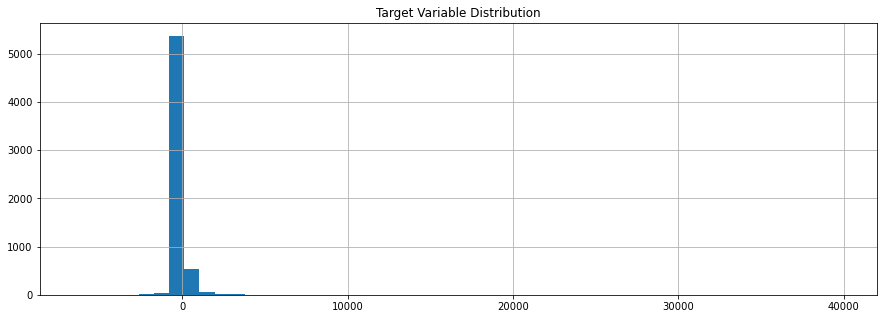

In [158]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.hist(df.sbk_expected_net_revenue_gbp_365, bins = 50)
plt.title('Target Variable Distribution')
plt.grid();

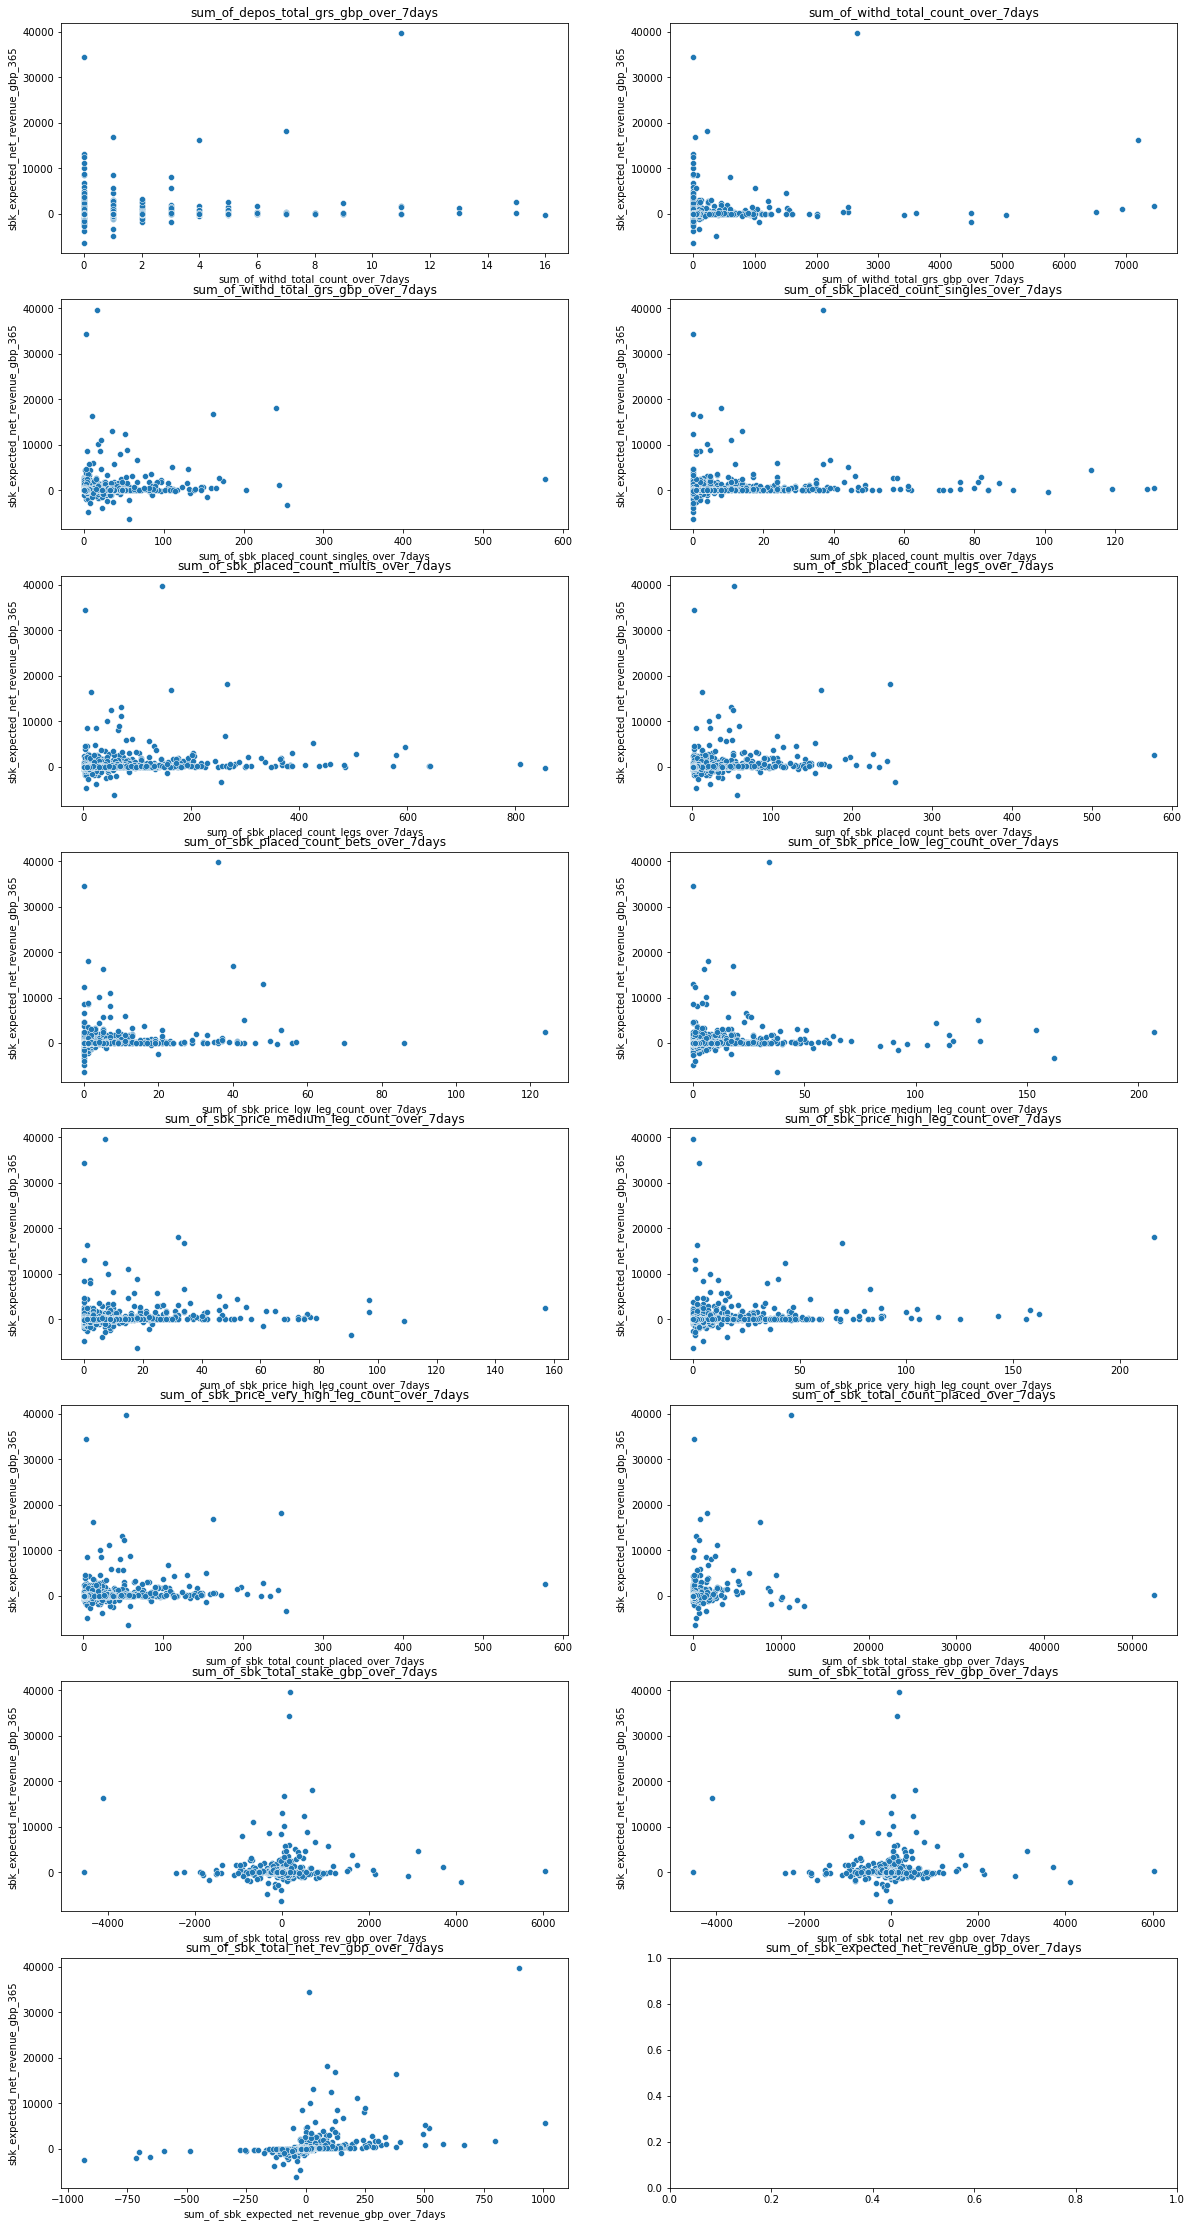

In [159]:
# plotting individual variables against target variable

numericals = list(df.iloc[:,1:17])

plt.rcParams['figure.figsize'] = [20, 50]

# Create subplots for each comedian
for i, numeric in enumerate(numericals):
    sns.scatterplot(x = df.loc[:,numeric], y = df.sbk_expected_net_revenue_gbp_365, data =df)
    plt.subplot(10, 2, i+1)
    plt.title(numericals[i])

No significant trends or patterns occurring with most variables. There are a few trends like expected revenue which show the strongest correlation, however most of the variables have significant distribution around 0 which makes things hard to predict. I suspect this is a result of only having 1 weeks worth of data, so maybe a longer period would yield more clear results.

<AxesSubplot:>

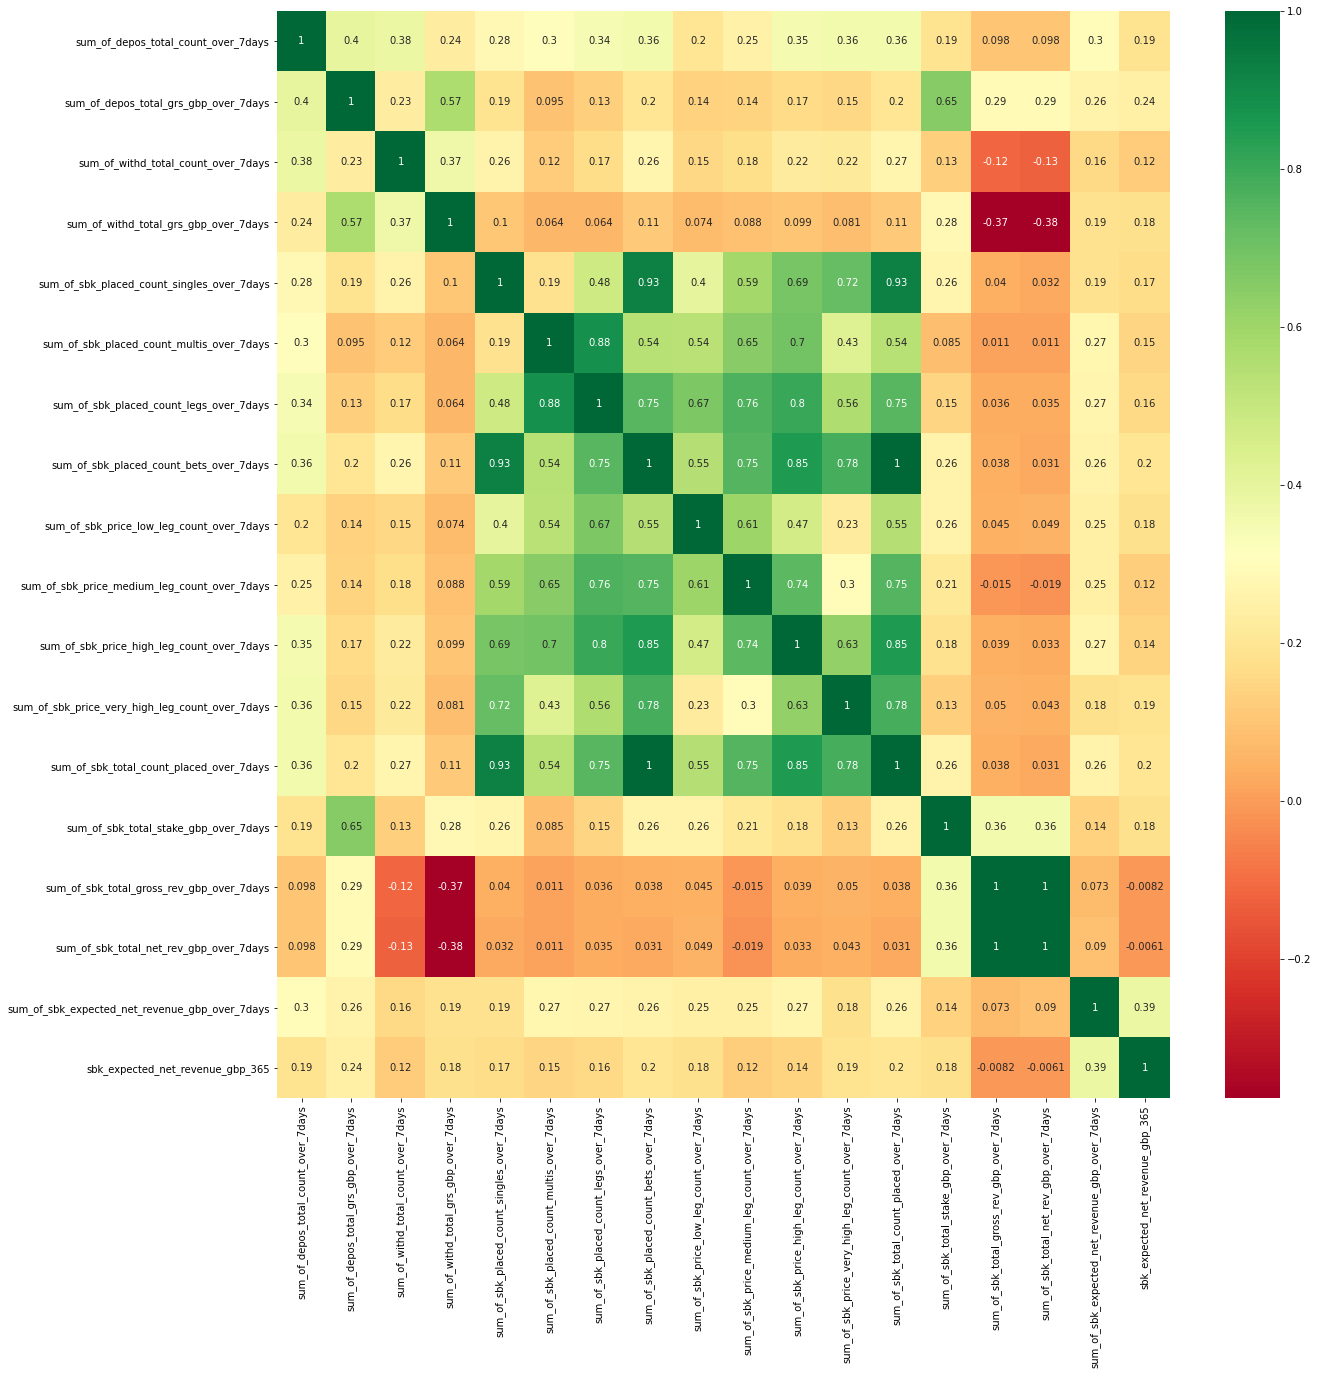

In [160]:
# correlation matrix to identify any particular strong correlations with target or identify instances
# of multicollinearity, which i would need to deal with later

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


As previously stated, there are no variables showing strong correlation with the target variable. Net expected revenue shows the strongest correlation at 0.39, and I suspect this will likely be the limiter for model accuracy.

Given the shape of the distribution, I decided here on out I would filter for outliers so that they would not have an effect on feature selection. I did this simply by using the IQR x 1.5 rule

In [161]:
#filter Outliers
df_filt = df[df['sbk_expected_net_revenue_gbp_365'] < Q3+Outlier]
df_filt = df_filt[df_filt['sbk_expected_net_revenue_gbp_365'] > Q1-Outlier]
df_filt.head()

,sum_of_depos_total_count_over_7days,sum_of_depos_total_grs_gbp_over_7days,sum_of_withd_total_count_over_7days,sum_of_withd_total_grs_gbp_over_7days,sum_of_sbk_placed_count_singles_over_7days,sum_of_sbk_placed_count_multis_over_7days,sum_of_sbk_placed_count_legs_over_7days,sum_of_sbk_placed_count_bets_over_7days,sum_of_sbk_price_low_leg_count_over_7days,sum_of_sbk_price_medium_leg_count_over_7days,...,sum_of_sbk_total_count_placed_over_7days,sum_of_sbk_total_stake_gbp_over_7days,sum_of_sbk_total_gross_rev_gbp_over_7days,sum_of_sbk_total_net_rev_gbp_over_7days,sum_of_sbk_expected_net_revenue_gbp_over_7days,most_recent_region,most_recent_stake_factor_group,most_recent_marketing_channel,brand_nk,sbk_expected_net_revenue_gbp_365
1,1.0,250.000,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,...,2.0,250.00000,250.000000,250.000000,6.838911,United Kingdom,Standard,Direct,BF,20.213603
2,1.0,5.000,1.0,3.3,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.70000,1.700000,1.700000,0.612472,United Kingdom,Standard,SEO,PP,0.612472
3,1.0,10.000,0.0,0.0,0.0,4.0,27.0,4.0,2.0,3.0,...,4.0,40.00000,40.000000,10.000000,-21.533351,United Kingdom,Standard,PPC (inc Competitor),BF,-1.238391
4,2.0,17.619,0.0,0.0,5.0,3.0,25.0,8.0,3.0,5.0,...,8.0,27.80321,24.869514,7.272514,-12.193369,Ireland,Standard,RAE,PP,26.592815
5,2.0,20.000,1.0,10.0,9.0,5.0,36.0,14.0,2.0,6.0,...,14.0,33.37000,1.700000,-0.300000,6.331548,United Kingdom,Standard,Direct,PP,9.971911


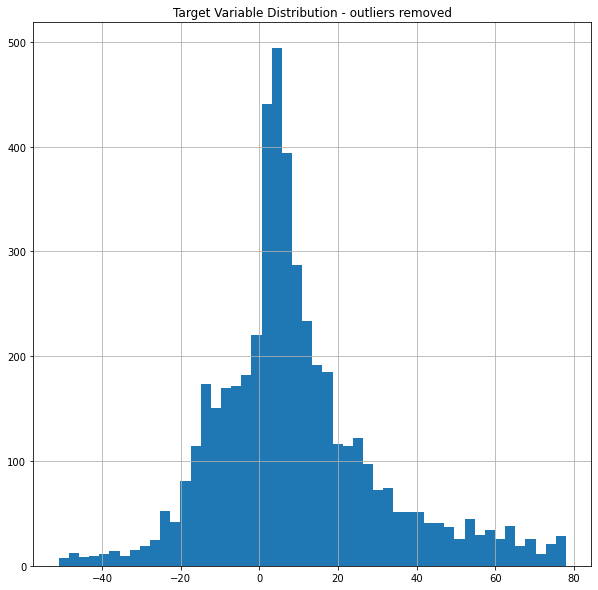

In [162]:
#replotting distribution of target variable

plt.rcParams['figure.figsize'] = [10, 10]
plt.hist(df_filt.sbk_expected_net_revenue_gbp_365, bins = 50)
plt.title('Target Variable Distribution - outliers removed')
plt.grid();

### 3.1.1 Numerical Feature Selection

It was at this point I wanted to assess which numerical features would be suitable to use in the model. I did this using two techniques:

1. Select K features using f_regression scoring to measure feature importance:

*A F-test is a way of comparing the significance of the improvement of a model, with respect to the addition of new variables. You can use it when have a basic model 𝑀0 and a more complicated model 𝑀1, which contains all variables from 𝑀0 and some more. The F-test tells you if 𝑀1 is significantly better than 𝑀0, with respect to a p-value.*

2. Use Variable Inflation Factors (VIF) scoring to measure collinearity (or how well variables can be described with other variables). VIF can be described using the equation below:

$$ VIF = \frac{1}{1-R^2} $$

*R^2 value is determined to find out how well an independent variable is described by the other independent variables. A high value of R^2 means that the variable is highly correlated with the other variables. So, the closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.*

In [163]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# generate dataset
X = df_filt.iloc[:,1:17]
y = df_filt.iloc[:,-1]
# define feature selection
fs = SelectKBest(score_func=f_regression, k='all')
# apply feature selection
X_selected = fs.fit(X, y)

dfscores = pd.DataFrame(X_selected.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns


#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

featureScores['vif_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# only show variables with VIF scores lower than 10. A VIF score higher than 10 generally indicates high collinearity
# with one or more features.

sorted_scores=featureScores[featureScores['vif_Factor']<10].sort_values('Score', ascending = False).reset_index(drop=True)
sorted_scores

/Users/Julien/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,Score,vif_Factor
0,sum_of_sbk_expected_net_revenue_gbp_over_7days,3646.210654,2.089818
1,sum_of_sbk_price_low_leg_count_over_7days,238.074565,3.760974
2,sum_of_sbk_price_medium_leg_count_over_7days,165.849662,6.119602
3,sum_of_sbk_price_high_leg_count_over_7days,122.129099,5.801055
4,sum_of_depos_total_grs_gbp_over_7days,52.665907,1.511054
5,sum_of_sbk_total_stake_gbp_over_7days,37.560750,2.187298
6,sum_of_withd_total_count_over_7days,18.386438,1.549379
7,sum_of_withd_total_grs_gbp_over_7days,0.798051,2.083037


In [164]:
# Down from 18 Variables to 8 using this method

numeric_features = list(sorted_scores.iloc[:,0])
numeric_features

['sum_of_sbk_expected_net_revenue_gbp_over_7days',
 'sum_of_sbk_price_low_leg_count_over_7days',
 'sum_of_sbk_price_medium_leg_count_over_7days',
 'sum_of_sbk_price_high_leg_count_over_7days',
 'sum_of_depos_total_grs_gbp_over_7days',
 'sum_of_sbk_total_stake_gbp_over_7days',
 'sum_of_withd_total_count_over_7days',
 'sum_of_withd_total_grs_gbp_over_7days']

# 3.2 Categorical Variables

For the categorical variables I took a similar approach, but the same feature selection techniques were not possible.

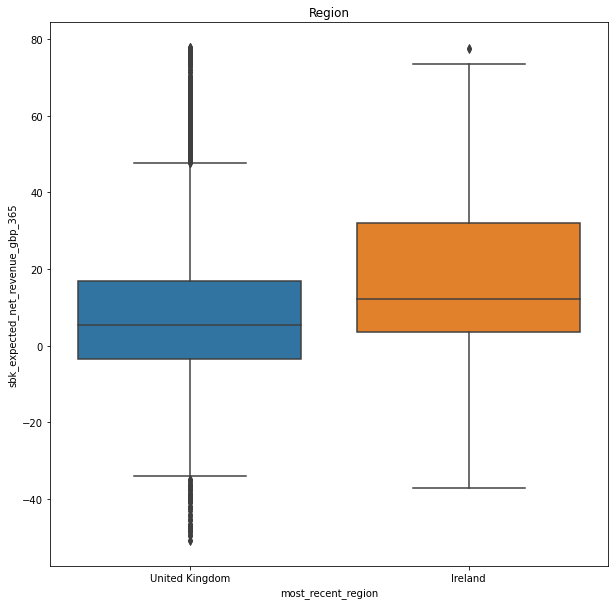

In [165]:
fig = plt.figure(figsize=[10,10])
ax = sns.boxplot(x = 'most_recent_region', y = 'sbk_expected_net_revenue_gbp_365', data = df_filt)
plt.title('Region');

In [166]:
df.groupby('most_recent_region')['sbk_expected_net_revenue_gbp_365'].mean()

most_recent_region
Ireland           177.794842
United Kingdom     78.825553
Name: sbk_expected_net_revenue_gbp_365, dtype: float64

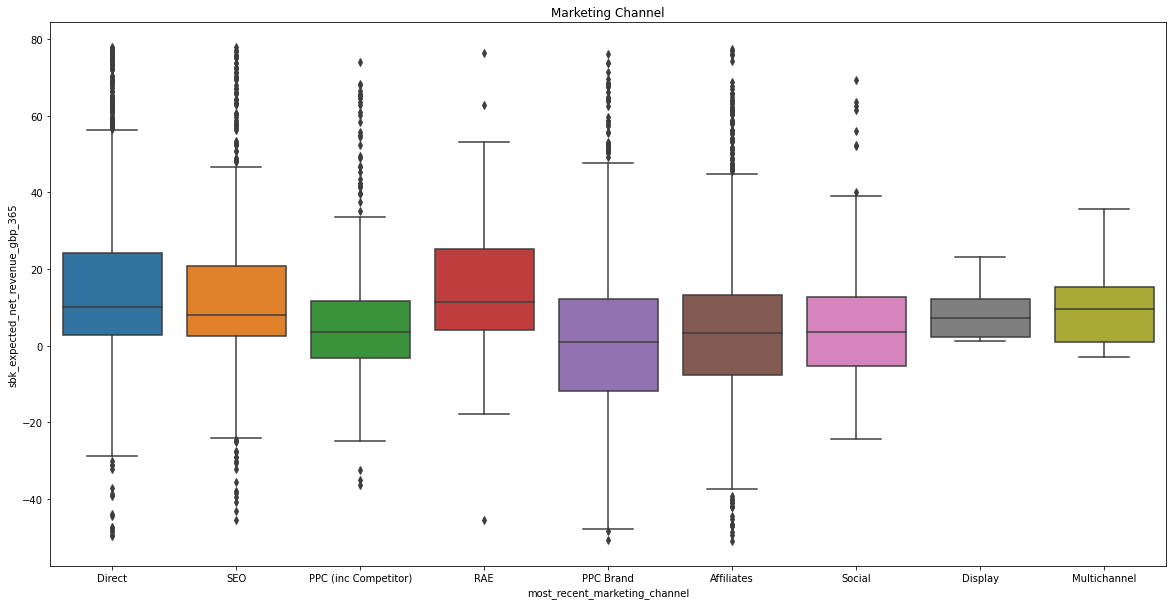

In [167]:
fig = plt.figure(figsize = [20,10])
ax = sns.boxplot(x = 'most_recent_marketing_channel', y = 'sbk_expected_net_revenue_gbp_365', data = df_filt)
plt.title('Marketing Channel');

In [168]:
df_filt.groupby('most_recent_marketing_channel')['sbk_expected_net_revenue_gbp_365'].mean()

most_recent_marketing_channel
Affiliates               5.024680
Direct                  15.134178
Display                  8.899336
Multichannel            11.726170
PPC (inc Competitor)     7.160741
PPC Brand                2.625417
RAE                     15.248753
SEO                     13.242633
Social                   6.524821
Name: sbk_expected_net_revenue_gbp_365, dtype: float64

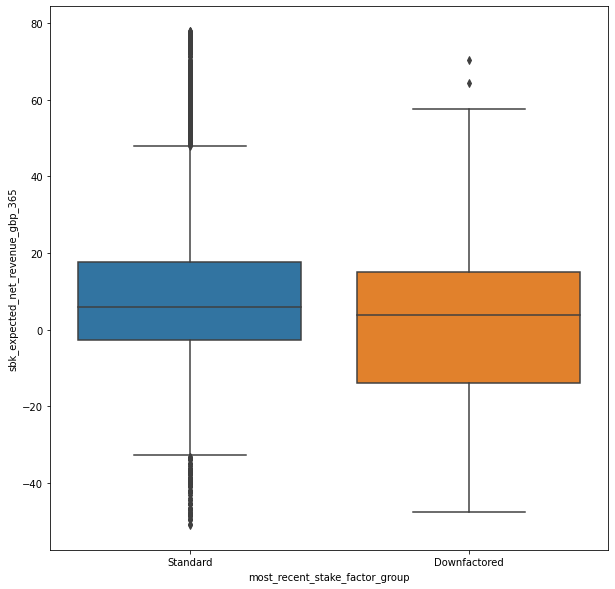

In [169]:
fig = plt.figure(figsize = [10,10])
ax = sns.boxplot(x = 'most_recent_stake_factor_group', y = 'sbk_expected_net_revenue_gbp_365', data = df_filt)

In [170]:
df.groupby('most_recent_stake_factor_group')['sbk_expected_net_revenue_gbp_365'].mean()

most_recent_stake_factor_group
Downfactored    321.995508
Standard         82.516561
Upfactored      947.455309
Name: sbk_expected_net_revenue_gbp_365, dtype: float64

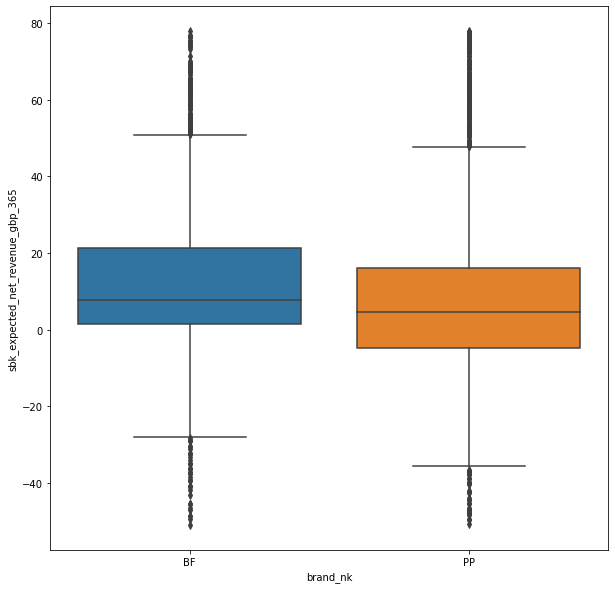

In [171]:
fig = plt.figure(figsize = [10,10])
ax = sns.boxplot(x = 'brand_nk', y = 'sbk_expected_net_revenue_gbp_365', data = df_filt)

### 3.2.1 Categorical Feature Selection

There are 4 potential categories in the dataset which could influence the target variable: brand, region, stake factor and marketing. Therefore, it was important to identify through statistical tests whether these variables had a significant effect on the target or whether it's random chance that the values are different. 

To measure this effect, i first needed to assess how normal the data was before selecting the correct variance test. For normal data (from a normal distribution), it is typical to use something like an ANOVA analysis on categorical data. However, if the data is non-normal, a non-parametric test is usually used. This is something like a Kruskal-Wallis test. 

In [172]:
#NORMALITY TEST
from scipy.stats import normaltest

k2, p = normaltest(df_filt.sbk_expected_net_revenue_gbp_365)
alpha = 0.05
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected - data is non-normal")
else:
    print("The null hypothesis cannot be rejected - data is normal")

p = 3.45722e-111
The null hypothesis can be rejected - data is non-normal


Data is non-normal, this means we cannot use usual means of testing significance for categorical variables, such as analysis of variance or ANOVA. Therefore the alternative is to use a Kruskal-Wallis test, which is
non-parametric and therefore suitable for non-normal data. This is the test we will use to see which categorical
variables need to be kept in the model.

In [173]:
from scipy.stats import kruskal

test1 = df_filt[df_filt['brand_nk'] == 'PP'].sbk_expected_net_revenue_gbp_365
test2 = df_filt[df_filt['brand_nk'] == 'BF'].sbk_expected_net_revenue_gbp_365

test3 = df_filt[df_filt['most_recent_region'] == 'United Kingdom'].sbk_expected_net_revenue_gbp_365
test4 = df_filt[df_filt['most_recent_region'] == 'Ireland'].sbk_expected_net_revenue_gbp_365

test5 = df_filt[df_filt['most_recent_stake_factor_group'] == 'Downfactored'].sbk_expected_net_revenue_gbp_365
test6 = df_filt[df_filt['most_recent_stake_factor_group'] == 'Standard'].sbk_expected_net_revenue_gbp_365

test7 = df_filt[df_filt['most_recent_marketing_channel'] == 'Affiliates'].sbk_expected_net_revenue_gbp_365
test8 = df_filt[df_filt['most_recent_marketing_channel'] == 'Direct'].sbk_expected_net_revenue_gbp_365
test9 = df_filt[df_filt['most_recent_marketing_channel'] == 'Multichannel'].sbk_expected_net_revenue_gbp_365
test10 = df_filt[df_filt['most_recent_marketing_channel'] == 'PPC (inc Competitor)'].sbk_expected_net_revenue_gbp_365        
test11 = df_filt[df_filt['most_recent_marketing_channel'] == 'PPC Brand'].sbk_expected_net_revenue_gbp_365
test12 = df_filt[df_filt['most_recent_marketing_channel'] == 'RAE'].sbk_expected_net_revenue_gbp_365
test13 = df_filt[df_filt['most_recent_marketing_channel'] == 'SEO'].sbk_expected_net_revenue_gbp_365
test14 = df_filt[df_filt['most_recent_marketing_channel'] == 'Social'].sbk_expected_net_revenue_gbp_365
test15 = df_filt[df_filt['most_recent_marketing_channel'] == 'Display'].sbk_expected_net_revenue_gbp_365

print('Brand: ', kruskal(test1, test2))
print('Region: ', kruskal(test3, test4))
print('Stake factor: ', kruskal(test5, test6))
print('Marketing channel: ', kruskal(test7,test8,test9,test10,test11,test12,test13,test14,test15))

Brand:  KruskalResult(statistic=57.187745663886524, pvalue=3.9613173952388594e-14)
Region:  KruskalResult(statistic=73.26981169263206, pvalue=1.1308436089050112e-17)
Stake factor:  KruskalResult(statistic=3.630866385411063, pvalue=0.05671728377082551)
Marketing channel:  KruskalResult(statistic=367.10082030120384, pvalue=2.0197699414652866e-74)


In [174]:
print("can't reject null hypothesis (H0) for stake factor since p=value > 0.05, other categoricals remain in model")

can't reject null hypothesis (H0) for stake factor since p=value > 0.05, other categoricals remain in model


So now we have selected our numerical features/ variables as well as the categorical ones. Its now time to prepare the data for building into a model.

# 4. Model Preparation

In [175]:
# select variables for model by filtering columns in df_filt
categorical_features = list(['brand_nk', 'most_recent_region', 'most_recent_marketing_channel'])

features = numeric_features + categorical_features
features = features + list(['sbk_expected_net_revenue_gbp_365'])

data = df_filt[df_filt.columns.intersection(features)]

In [176]:
data.head()

,sum_of_depos_total_grs_gbp_over_7days,sum_of_withd_total_count_over_7days,sum_of_withd_total_grs_gbp_over_7days,sum_of_sbk_price_low_leg_count_over_7days,sum_of_sbk_price_medium_leg_count_over_7days,sum_of_sbk_price_high_leg_count_over_7days,sum_of_sbk_total_stake_gbp_over_7days,sum_of_sbk_expected_net_revenue_gbp_over_7days,most_recent_region,most_recent_marketing_channel,brand_nk,sbk_expected_net_revenue_gbp_365
1,250.000,0.0,0.0,0.0,0.0,2.0,250.00000,6.838911,United Kingdom,Direct,BF,20.213603
2,5.000,1.0,3.3,0.0,0.0,1.0,1.70000,0.612472,United Kingdom,SEO,PP,0.612472
3,10.000,0.0,0.0,2.0,3.0,2.0,40.00000,-21.533351,United Kingdom,PPC (inc Competitor),BF,-1.238391
4,17.619,0.0,0.0,3.0,5.0,3.0,27.80321,-12.193369,Ireland,RAE,PP,26.592815
5,20.000,1.0,10.0,2.0,6.0,7.0,33.37000,6.331548,United Kingdom,Direct,PP,9.971911


In [177]:
# one hot encode categoricals by using pandas get dummies function
data = pd.get_dummies(data, columns=['brand_nk','most_recent_region', 'most_recent_marketing_channel'])

In [178]:
# moving target variable to end again
cols = list(data.columns.values)
cols.pop(cols.index('sbk_expected_net_revenue_gbp_365'))
data = data[cols+['sbk_expected_net_revenue_gbp_365']] 

In [179]:
# Scaling to remove magnitudes of each variable and using variance instead
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_columns  = scaler.fit_transform(data[data.columns.intersection(numeric_features)])

# setting X
X = np.concatenate([scaled_columns, data.iloc[:,8:21]], axis=1)
X = pd.DataFrame(X, columns = cols)

In [180]:
X.head()

,sum_of_depos_total_grs_gbp_over_7days,sum_of_withd_total_count_over_7days,sum_of_withd_total_grs_gbp_over_7days,sum_of_sbk_price_low_leg_count_over_7days,sum_of_sbk_price_medium_leg_count_over_7days,sum_of_sbk_price_high_leg_count_over_7days,sum_of_sbk_total_stake_gbp_over_7days,sum_of_sbk_expected_net_revenue_gbp_over_7days,brand_nk_BF,brand_nk_PP,...,most_recent_region_United Kingdom,most_recent_marketing_channel_Affiliates,most_recent_marketing_channel_Direct,most_recent_marketing_channel_Display,most_recent_marketing_channel_Multichannel,most_recent_marketing_channel_PPC (inc Competitor),most_recent_marketing_channel_PPC Brand,most_recent_marketing_channel_RAE,most_recent_marketing_channel_SEO,most_recent_marketing_channel_Social
0,2.597962,-0.516217,-0.267071,-0.423191,-0.529997,0.020579,2.700333,0.413379,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.286049,0.512216,-0.232033,-0.423191,-0.529997,-0.237079,-0.511363,-0.078932,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.227192,-0.516217,-0.267071,0.194302,0.258860,0.020579,-0.015962,-1.829956,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.137505,-0.516217,-0.267071,0.503049,0.784764,0.278237,-0.173724,-1.091463,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.109477,0.512216,-0.160895,0.194302,1.047717,1.308869,-0.101719,0.373263,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [181]:
# setting y
y = data.iloc[:,-1]

# 5. Model Building

In [182]:
#create training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

## 5.1 Regression Modelling

Since we are trying to predict revenue over a continuous range, we have a regression problem. the simplest way to model a regression problem is using linear regression and other regression models (to compare), so this is exactly what I did.

In [183]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

#LINEAR REGRESSION

# Initilize, fit, predict
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_ypred = lin_reg.predict(X_test)

#RIDGE REGRESSION - using cross-validation to select best alpha value for model

ridge = RidgeCV(alphas=np.arange(1, 100, 5), scoring='r2', cv=10)
ridge.fit(X_train, y_train)
ra = ridge.alpha_

ridge = Ridge(alpha=ridge.alpha_)
ridge.fit(X_train, y_train)
rid_ypred = ridge.predict(X_test)

#LASSO REGRESSION - using cross-validation to select best alpha value for model

lasso = LassoCV(alphas=np.arange(0.000000001, 10, 0.05), cv=10)
lasso.fit(X_train, y_train)
la = lasso.alpha_

lasso = Lasso(alpha=lasso.alpha_)
lasso.fit(X_train, y_train)
las_ypred = lasso.predict(X_test)

# Preparing results table 

tr1=lin_reg.score(X_train, y_train)
tr2=ridge.score(X_train, y_train)
tr3=lasso.score(X_train, y_train)
te1=lin_reg.score(X_test, y_test)
te2=ridge.score(X_test, y_test)
te3=lasso.score(X_test, y_test)

R2_train_score = [tr1, tr2, tr3]
R2_test_score = [te1,te2,te3]
MSE = [mse(y_test, lin_ypred), mse(y_test, rid_ypred), mse(y_test, las_ypred)]
MAE = [mae(y_test, lin_ypred), mae(y_test, rid_ypred), mae(y_test, las_ypred)]
alpha = ['N/A',ra ,la]

index = ['R2 training score', 'R2 test score','MSE score' , 'MAE score', 'alpha']
columns = ['Linear', 'Ridge', 'Lasso']

regression_scores = pd.DataFrame([R2_train_score, R2_test_score, MSE, MAE, alpha], columns = columns, index = index)
regression_scores = regression_scores.transpose()
regression_scores.columns.name = 'Regression'
regression_scores

/Users/Julien/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47308.94718282076, tolerance: 158.33341198392566
  model = cd_fast.enet_coordinate_descent_gram(
/Users/Julien/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29791.89240732114, tolerance: 158.07302763761152
  model = cd_fast.enet_coordinate_descent_gram(
/Users/Julien/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30263.746203146293, tolerance: 160.79883301244206
  model = cd_fast.enet_coordinate_descent_gram(
/Users/Julien/opt/anaconda3/lib/python3.8/site-pack

Regression,R2 training score,R2 test score,MSE score,MAE score,alpha
Linear,0.444569,0.47029,225.052,10.4809,N/A
Ridge,0.44423,0.471438,224.564,10.479,56
Lasso,0.443601,0.47323,223.803,10.4641,0.05


So all models performed similar, with a best $ R^2 $ test score of 0.473 for Lasso regression (out of 1), which is not great. I think a large part of model inaccuracy comes from the lack of strong correlation between the selected variables and the target.

In [184]:
# seeing how Lasso regression has reduced number of features
print("Number of features before Lasso:", len(lasso.coef_))
print("Number of features after fitting Lasso:", len(lasso.coef_[lasso.coef_ > 0]))

Number of features before Lasso: 21
Number of features after fitting Lasso: 10


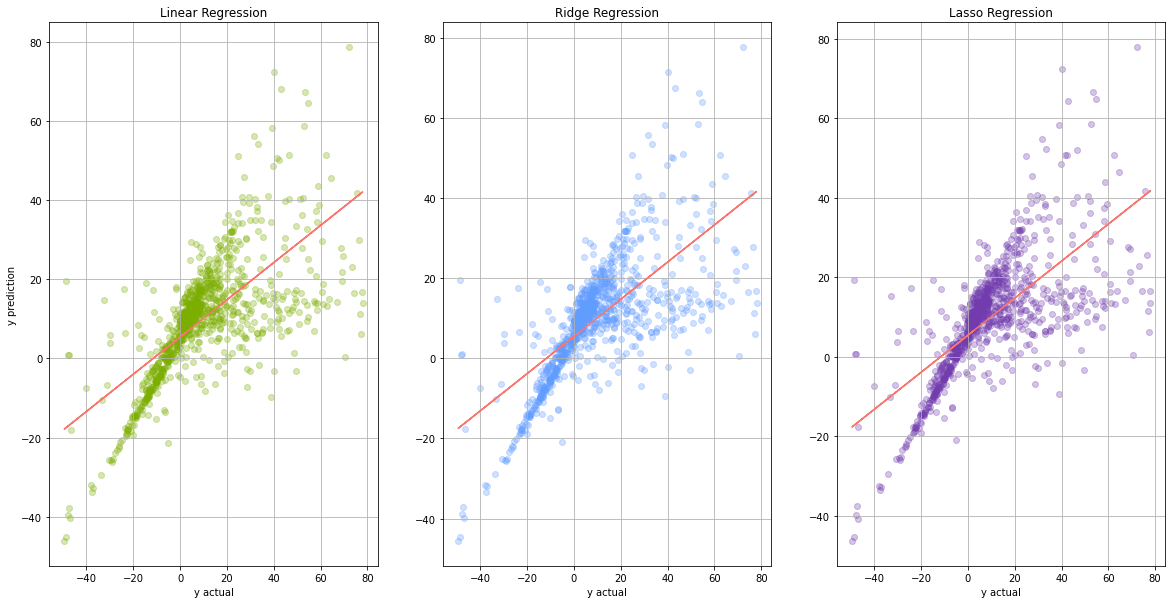

In [185]:
#plotting y_test and y_predict for each model to see how each regression fits the data

fig, ax  = plt.subplots(figsize=(20,10))

# Linear 

plt.subplot(1, 3, 1)
plt.scatter(y_test, lin_ypred, c="#7CAE00", alpha=0.3)

z = np.polyfit(y_test, lin_ypred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"#F8766D")

plt.ylabel('y prediction')
plt.xlabel('y actual')
plt.title('Linear Regression')
plt.grid()

# Ridge

plt.subplot(1, 3, 2)
plt.scatter(y_test, rid_ypred, c="#619CFF", alpha=0.3)

z = np.polyfit(y_test, rid_ypred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"#F8766D")
plt.xlabel('y actual')
plt.title('Ridge Regression')
plt.grid()

# Lasso

plt.subplot(1, 3, 3)
plt.scatter(y_test, las_ypred, c="#723CAF", alpha=0.3)

z = np.polyfit(y_test, las_ypred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"#F8766D")
plt.xlabel('y actual')
plt.title('Lasso Regression')
plt.grid()

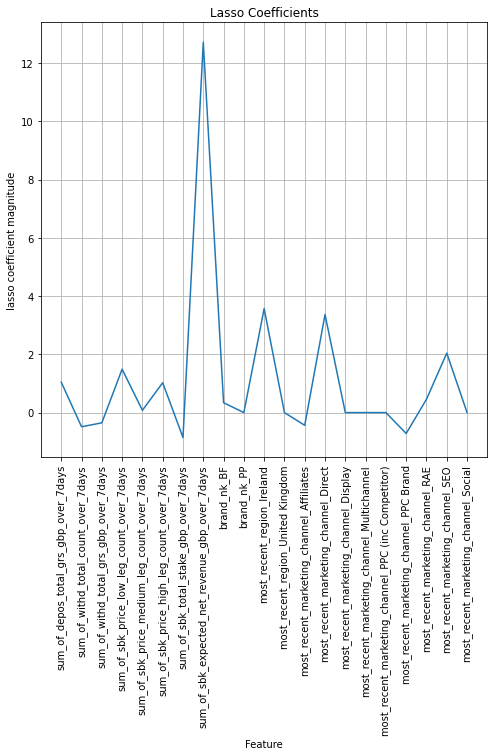

In [186]:
# seeing how Lasso adjusts magnitude of coefficients (features) to optimise model performance

fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(X_train.columns, lasso.coef_)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.ylabel('lasso coefficient magnitude')
plt.xlabel('Feature')
plt.grid()
plt.title('Lasso Coefficients');

## 5.2 Other Modelling

i decided to run a XGBoost model to see if the results could be improved. Whilst the $ R^2 $, MSE and MAE scores were slightly improved, i dont think there is significant benefit here versus normal Linear regression. I also tried running some tuning loops to imrove the score, which chose a relatively low number of estimators (20 vs 100 default) for a $ R^2 $ of 0.5

In [187]:
import xgboost as xgb

regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("Training score:", regressor.score(X_train, y_train))
print("Testing score:", regressor.score(X_test, y_test))
print("MSE of XGBoost:", mse(y_test, y_pred))
print("MAE of XGBoost:", mae(y_test, y_pred))

Training score: 0.8634386390194286
Testing score: 0.4461939872615749
MSE of XGBoost: 235.28904508017354
MAE of XGBoost: 10.27503372729321


the best estimators value is:  10  with a mae of:  9.741264713689834
the best estimators value is:  20  with a mse of:  213.6690857392361
the best estimators value is:  20  with a r2 of:  0.49708145409663984


Text(0.5, 0, 'n_estimators')

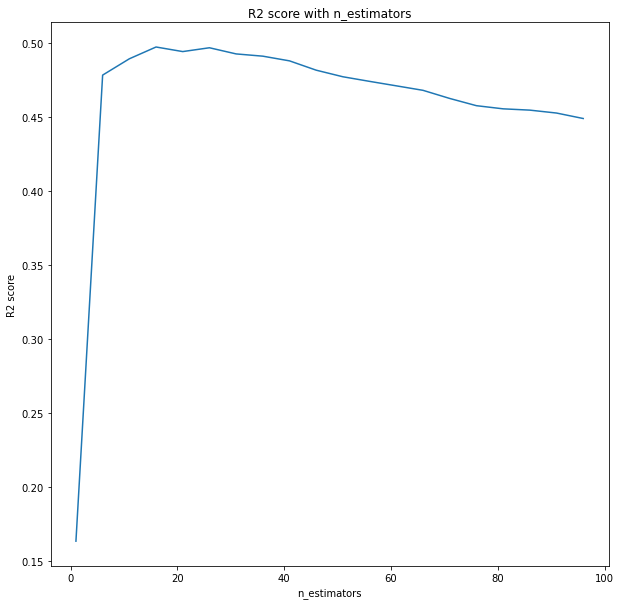

In [188]:
mae_score = []
mse_score = []
test_score = []

for r in range(1,100,5):
    xgbreg = xgb.XGBRegressor(n_estimators=r).fit(X_train, y_train)
    xgb_ypred = xgbreg.predict(X_test)

    mae_score.append(mae(y_test, xgb_ypred))
    mse_score.append(mse(y_test, xgb_ypred))
    test_score.append(xgbreg.score(X_test, y_test))
    
plt.plot(range(1,100,5), test_score)
print('the best estimators value is: ',(mae_score.index(min(mae_score))+1)*5, ' with a mae of: ', min(mae_score))
print('the best estimators value is: ',(mse_score.index(min(mse_score))+1)*5, ' with a mse of: ', min(mse_score))
print('the best estimators value is: ',(test_score.index(max(test_score))+1)*5, ' with a r2 of: ', max(test_score))
plt.title('R2 score with n_estimators')
plt.ylabel('R2 score')
plt.xlabel('n_estimators')

In [190]:
regressor = xgb.XGBRegressor(n_estimators = 20)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("Training score:", regressor.score(X_train, y_train))
print("Testing score:", regressor.score(X_test, y_test))
print("MSE of XGBoost:", mse(y_test, y_pred))
print("MAE of XGBoost:", mae(y_test, y_pred))

Training score: 0.6798119412386094
Testing score: 0.4957048592497769
MSE of XGBoost: 214.25394339612404
MAE of XGBoost: 9.78948537093106


# 6. Conclusion

I think there is a significant amount of noise in the dataset that makes the accuracy of the model quite limited. This is possibly due to the lack of long-term data to accurately predict annual or future revenue, so maybe if doing this again taking snapshot of data for longer periods of time (e.g. 1-3 months) might improve forecasting accuracy. A lot of the features did not strongly correlate with the target as well, so perhaps variables that could indicate betting trends like type of event/sport betted on, active usage, betting frequency etc would improve forecasting prediction.